In [1]:
import numpy as np
import pandas as pd
import dateutil
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# churn.csv
churn_df = pd.read_csv("./data/churn.csv")
churn_df["lastParticipationDate"] = pd.to_datetime(churn_df["lastParticipationDate"]).dt.normalize()

# comments_clean_anonymized.csv
cca_df = pd.read_csv("./data/comments_clean_anonymized.csv")
cca_df['commentDate'] = pd.to_datetime(cca_df['commentDate']).dt.normalize()
cca_df.head()

# votes
votes_df = pd.read_csv("./data/votes.csv")
votes_df["voteDate"] = pd.to_datetime(votes_df["voteDate"]).dt.normalize()
votes_df.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/python_dateutil-2.8.1-py3.8.egg/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/python_dateutil-2.8.1-py3.8.egg/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,2016-02-01,4
1,33,56aec740f1ef260003e307d6,2016-02-01,4
2,79,56aec740f1ef260003e307d6,2016-02-01,4
3,94,56aec740f1ef260003e307d6,2016-02-01,4
4,16,56aec740f1ef260003e307d6,2016-02-01,2


In [3]:
firstVoteDate = votes_df.groupby(["employee", "companyAlias"]).agg({"voteDate": "min"}).reset_index()
firstVoteDate.rename(columns={"voteDate": "firstVoteDate"}, inplace=True)
firstVoteDate

,employee,companyAlias,firstVoteDate
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25
1,1,54d43612e4b0f6a40755d93e,2015-02-06
2,1,54e52607e4b01191dc064966,2015-03-25
3,1,5641f96713664c000332c8cd,2016-04-28
4,1,56558cfd07a5de00030908fb,2015-11-25
...,...,...,...
4372,991,54e52607e4b01191dc064966,2016-09-21
4373,995,54e52607e4b01191dc064966,2016-09-01
4374,996,54e52607e4b01191dc064966,2016-09-05
4375,997,54e52607e4b01191dc064966,2016-11-14


In [4]:
firstCommentDate = cca_df.groupby(["employee", 
                                   "companyAlias"]).agg({"commentDate": "min"}).reset_index()
firstCommentDate.rename(columns={"commentDate": "firstCommentDate"}, inplace=True)
firstCommentDate

,employee,companyAlias,firstCommentDate
0,-217,54e52607e4b01191dc064966,2015-02-26
1,-216,54e52607e4b01191dc064966,2015-02-25
2,-214,54e52607e4b01191dc064966,2015-03-06
3,-213,54e52607e4b01191dc064966,2015-03-09
4,-212,54e52607e4b01191dc064966,2015-03-10
...,...,...,...
3214,968,54e52607e4b01191dc064966,2016-09-13
3215,969,54e52607e4b01191dc064966,2016-10-10
3216,970,54e52607e4b01191dc064966,2016-09-13
3217,996,54e52607e4b01191dc064966,2016-09-05


In [5]:
# firstActiveDate = earlier of (firstVoteDate, firstCommentDate)
firstDates = pd.merge(firstVoteDate, firstCommentDate, on=["employee", "companyAlias"], how="outer")
firstDates["firstActiveDate"] = firstDates[['firstVoteDate','firstCommentDate']].min(axis=1)
firstDates

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25
1,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06
2,1,54e52607e4b01191dc064966,2015-03-25,NaT,2015-03-25
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28
4,1,56558cfd07a5de00030908fb,2015-11-25,2015-11-25,2015-11-25
...,...,...,...,...,...
4710,-2,57c4aa7dbb8b5c000396fd3b,NaT,2016-09-21,2016-09-21
4711,-2,57d1eb86a22c9d0003dd1f05,NaT,2016-09-12,2016-09-12
4712,-2,57dd2d6a4018d9000339ca43,NaT,2016-09-22,2016-09-22
4713,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01


In [6]:
# Setting one time period = 30 days
timePeriod = 30

In [7]:
# Merge first dates with the votes dataframe
votes_merge = pd.merge(firstDates, votes_df, on=["employee", "companyAlias"], how="inner")
votes_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,voteDate,vote
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2014-11-25,4
1,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2014-11-26,4
2,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-06,3
3,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-12,3
4,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-19,4
...,...,...,...,...,...,...,...
221227,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-01-21,3
221228,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-01-30,3
221229,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-02-03,3
221230,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-02-10,2


In [8]:
# Calculate the time period of each vote
votes_merge["period"] = np.ceil(((votes_merge["voteDate"] - 
                                  votes_merge["firstActiveDate"]).dt.days + 1) / timePeriod)
votes_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,voteDate,vote,period
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2014-11-25,4,1.0
1,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2014-11-26,4,1.0
2,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-06,3,1.0
3,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-12,3,1.0
4,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-19,4,1.0
...,...,...,...,...,...,...,...,...
221227,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-01-21,3,5.0
221228,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-01-30,3,5.0
221229,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-02-03,3,5.0
221230,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-02-10,2,5.0


In [9]:
# Merge first dates with the cca dataframe
cca_merge = pd.merge(firstDates, cca_df, on=["employee", "companyAlias"], how="inner")
cca_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,commentId,txt,likes,dislikes,commentDate
0,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,589d817d03f2e60004fff0f8,******************,6.0,1.0,2017-02-10
1,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587c9cc45a5d5d00047d3516,***********,3.0,3.0,2017-01-16
2,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587ae5e11ddb6800040be36c,*,0.0,3.0,2017-01-15
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587a5f0fc535230004ca0445,*,0.0,3.0,2017-01-14
4,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,5878d346e201b100044843dd,*,0.0,5.0,2017-01-13
...,...,...,...,...,...,...,...,...,...,...
82751,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,5847c05ef77d9e0004700393,**********************************************...,0.0,1.0,2016-12-07
82752,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,58413c460176d500049f939b,*********************************************,2.0,0.0,2016-12-02
82753,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,583fd0f779244000040dd4d6,*******************************,2.0,0.0,2016-12-01
82754,-2,58a728a0e75bda00042a3468,NaT,2017-03-03,2017-03-03,58b92e4746b59c00044ee4e3,**********************************************...,18.0,20.0,2017-03-03


In [10]:
# Calculate the time period of each vote
cca_merge["period"] = np.ceil(((cca_merge["commentDate"] - 
                                cca_merge["firstActiveDate"]).dt.days + 1) / timePeriod)
cca_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,commentId,txt,likes,dislikes,commentDate,period
0,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,589d817d03f2e60004fff0f8,******************,6.0,1.0,2017-02-10,10.0
1,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587c9cc45a5d5d00047d3516,***********,3.0,3.0,2017-01-16,9.0
2,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587ae5e11ddb6800040be36c,*,0.0,3.0,2017-01-15,9.0
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587a5f0fc535230004ca0445,*,0.0,3.0,2017-01-14,9.0
4,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,5878d346e201b100044843dd,*,0.0,5.0,2017-01-13,9.0
...,...,...,...,...,...,...,...,...,...,...,...
82751,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,5847c05ef77d9e0004700393,**********************************************...,0.0,1.0,2016-12-07,1.0
82752,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,58413c460176d500049f939b,*********************************************,2.0,0.0,2016-12-02,1.0
82753,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,583fd0f779244000040dd4d6,*******************************,2.0,0.0,2016-12-01,1.0
82754,-2,58a728a0e75bda00042a3468,NaT,2017-03-03,2017-03-03,58b92e4746b59c00044ee4e3,**********************************************...,18.0,20.0,2017-03-03,1.0


In [11]:
votes_snapshot = votes_merge.groupby(["employee", 
                                      "companyAlias",
                                      "firstActiveDate",
                                      "period"]).agg({"vote": ["mean", "count"]}).reset_index()

votes_snapshot.columns = ['_'.join(col).strip() if len(col[1]) > 0 else col[0] for col in votes_snapshot.columns.values]
votes_snapshot

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,1.0,4.00,2
1,1,54d43612e4b0f6a40755d93e,2015-02-06,1.0,3.20,5
2,1,54d43612e4b0f6a40755d93e,2015-02-06,15.0,2.50,2
3,1,54d43612e4b0f6a40755d93e,2015-02-06,16.0,3.25,8
4,1,54d43612e4b0f6a40755d93e,2015-02-06,17.0,3.00,1
...,...,...,...,...,...,...
20458,999,54e52607e4b01191dc064966,2016-09-15,2.0,3.00,4
20459,999,54e52607e4b01191dc064966,2016-09-15,3.0,3.00,1
20460,999,54e52607e4b01191dc064966,2016-09-15,4.0,3.00,1
20461,999,54e52607e4b01191dc064966,2016-09-15,5.0,2.80,5


In [12]:
cca_merge['commentLen'] = cca_merge['txt'].str.len()
cca_snapshot = cca_merge.groupby(["employee", 
                                  "companyAlias",
                                  "firstActiveDate",
                                  "period"]).agg({"commentId": "count",
                                                  "likes": ["sum", "mean"],
                                                  "dislikes": ["sum", "mean"], 
                                                  "commentLen": "mean"
                                                 }).reset_index()
cca_snapshot.columns = ['_'.join(col).strip() if len(col[1]) > 0 else col[0] for col in cca_snapshot.columns.values]
cca_snapshot

,employee,companyAlias,firstActiveDate,period,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean
0,-217,54e52607e4b01191dc064966,2015-02-26,1.0,2,16.0,8.0,0.0,0.00,258.00
1,-216,54e52607e4b01191dc064966,2015-02-25,1.0,6,24.0,4.0,0.0,0.00,25.00
2,-214,54e52607e4b01191dc064966,2015-03-06,1.0,2,0.0,0.0,0.0,0.00,4.00
3,-213,54e52607e4b01191dc064966,2015-03-09,1.0,2,2.0,1.0,0.0,0.00,51.00
4,-212,54e52607e4b01191dc064966,2015-03-10,1.0,2,0.0,0.0,0.0,0.00,6.00
...,...,...,...,...,...,...,...,...,...,...
10593,970,54e52607e4b01191dc064966,2016-09-05,5.0,10,258.0,25.8,10.0,1.00,157.20
10594,970,54e52607e4b01191dc064966,2016-09-05,6.0,2,8.0,4.0,14.0,7.00,10.00
10595,996,54e52607e4b01191dc064966,2016-09-05,1.0,8,64.0,8.0,10.0,1.25,76.75
10596,996,54e52607e4b01191dc064966,2016-09-05,4.0,4,20.0,5.0,2.0,0.50,97.50


In [13]:
# Merge cca and votes snapshots
snapshot = pd.merge(votes_snapshot, cca_snapshot, 
                    on=["employee", "companyAlias", 
                        "firstActiveDate", "period"], 
                    how="outer")
snapshot.fillna(0, inplace=True)
snapshot

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,1.0,4.00,2.0,0.0,0.0,0.00,0.0,0.000000,0.00
1,1,54d43612e4b0f6a40755d93e,2015-02-06,1.0,3.20,5.0,0.0,0.0,0.00,0.0,0.000000,0.00
2,1,54d43612e4b0f6a40755d93e,2015-02-06,15.0,2.50,2.0,0.0,0.0,0.00,0.0,0.000000,0.00
3,1,54d43612e4b0f6a40755d93e,2015-02-06,16.0,3.25,8.0,0.0,0.0,0.00,0.0,0.000000,0.00
4,1,54d43612e4b0f6a40755d93e,2015-02-06,17.0,3.00,1.0,0.0,0.0,0.00,0.0,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
21225,118,54e52607e4b01191dc064966,2016-11-17,2.0,0.00,0.0,4.0,21.0,5.25,2.0,0.500000,53.75
21226,118,54e52607e4b01191dc064966,2016-11-17,3.0,0.00,0.0,1.0,12.0,12.00,0.0,0.000000,39.00
21227,118,54e52607e4b01191dc064966,2016-11-17,4.0,0.00,0.0,2.0,13.0,6.50,4.0,2.000000,48.50
21228,160,54e52607e4b01191dc064966,2016-12-22,3.0,0.00,0.0,3.0,12.0,4.00,23.0,7.666667,279.00


In [14]:
snapshot.describe()

,employee,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean
count,21230.000000,21230.000000,21230.000000,21230.000000,21230.000000,21230.000000,21230.000000,21230.000000,21230.000000,21230.000000
mean,164.120301,5.162694,2.795525,10.420725,3.898022,26.791521,3.631734,4.952567,0.640899,49.933597
std,181.490350,4.655730,0.941508,8.993091,7.047834,61.961478,6.091765,16.183340,1.662855,93.727515
min,-217.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,2.000000,2.416667,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,117.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,7.000000,3.366667,17.000000,4.000000,26.000000,5.200000,2.000000,0.500000,66.500000
max,999.000000,26.000000,4.000000,54.000000,68.000000,1002.000000,64.000000,474.000000,33.000000,1989.733333


In [15]:
# TODO add labels
# Merge first dates with the churn dataframe
churn_merge = pd.merge(firstDates, churn_df, on=["employee", "companyAlias"], how="inner")
churn_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,numVotes,lastParticipationDate,stillExists
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2,2014-11-26,True
1,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,16,2016-06-08,False
2,1,54e52607e4b01191dc064966,2015-03-25,NaT,2015-03-25,135,2016-09-29,False
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,257,2017-03-19,True
4,1,56558cfd07a5de00030908fb,2015-11-25,2015-11-25,2015-11-25,2,2015-11-29,True
...,...,...,...,...,...,...,...,...
4710,-2,574c423856b6300003009953,NaT,2016-08-11,2016-08-11,0,2017-03-07,False
4711,-2,57ac8b23be7fe30003e656d0,NaT,2016-10-21,2016-10-21,0,2016-12-26,False
4712,-2,57bb2f0b3bae540003a8d453,NaT,2017-01-19,2017-01-19,0,2017-01-19,False
4713,-2,57dd2d6a4018d9000339ca43,NaT,2016-09-22,2016-09-22,0,2016-12-31,False


In [16]:
# Calculate the time period of each vote
churn_merge["period"] = np.ceil(((churn_merge["lastParticipationDate"] - 
                                  churn_merge["firstActiveDate"]).dt.days + 1) / timePeriod)
churn_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,numVotes,lastParticipationDate,stillExists,period
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2,2014-11-26,True,1.0
1,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,16,2016-06-08,False,17.0
2,1,54e52607e4b01191dc064966,2015-03-25,NaT,2015-03-25,135,2016-09-29,False,19.0
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,257,2017-03-19,True,11.0
4,1,56558cfd07a5de00030908fb,2015-11-25,2015-11-25,2015-11-25,2,2015-11-29,True,1.0
...,...,...,...,...,...,...,...,...,...
4710,-2,574c423856b6300003009953,NaT,2016-08-11,2016-08-11,0,2017-03-07,False,7.0
4711,-2,57ac8b23be7fe30003e656d0,NaT,2016-10-21,2016-10-21,0,2016-12-26,False,3.0
4712,-2,57bb2f0b3bae540003a8d453,NaT,2017-01-19,2017-01-19,0,2017-01-19,False,1.0
4713,-2,57dd2d6a4018d9000339ca43,NaT,2016-09-22,2016-09-22,0,2016-12-31,False,4.0


In [17]:
# Merge snapshots with labels
churn_merge.drop(labels=["firstVoteDate", "firstCommentDate", "numVotes"], axis=1, inplace=True)
df = pd.merge(snapshot, churn_merge, 
              on=["employee", "companyAlias", 
                  "firstActiveDate", "period"], 
              how="outer")
df

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean,lastParticipationDate,stillExists
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,1.0,4.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-11-26,True
1,1,54d43612e4b0f6a40755d93e,2015-02-06,1.0,3.20,5.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaN
2,1,54d43612e4b0f6a40755d93e,2015-02-06,15.0,2.50,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaN
3,1,54d43612e4b0f6a40755d93e,2015-02-06,16.0,3.25,8.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaN
4,1,54d43612e4b0f6a40755d93e,2015-02-06,17.0,3.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-06-08,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21302,-6,54e52607e4b01191dc064966,2016-10-24,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-20,False
21303,-5,54e52607e4b01191dc064966,2016-10-19,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-20,False
21304,-5,574c423856b6300003009953,2016-08-29,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-11,False
21305,-5,57ac8b23be7fe30003e656d0,2016-10-07,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-23,False


In [18]:
df["stillExists"].fillna(True, inplace=True)
df.fillna(0, inplace=True)
df

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean,lastParticipationDate,stillExists
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,1.0,4.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-11-26 00:00:00,True
1,1,54d43612e4b0f6a40755d93e,2015-02-06,1.0,3.20,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True
2,1,54d43612e4b0f6a40755d93e,2015-02-06,15.0,2.50,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True
3,1,54d43612e4b0f6a40755d93e,2015-02-06,16.0,3.25,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True
4,1,54d43612e4b0f6a40755d93e,2015-02-06,17.0,3.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-06-08 00:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21302,-6,54e52607e4b01191dc064966,2016-10-24,5.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-03-20 00:00:00,False
21303,-5,54e52607e4b01191dc064966,2016-10-19,6.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-03-20 00:00:00,False
21304,-5,574c423856b6300003009953,2016-08-29,3.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-11 00:00:00,False
21305,-5,57ac8b23be7fe30003e656d0,2016-10-07,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-23 00:00:00,False


In [19]:
df.drop(labels=["firstActiveDate", "lastParticipationDate"], axis=1, inplace=True)
df

,employee,companyAlias,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean,stillExists
0,1,5474b9cde4b0bf7614b2c66f,1.0,4.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,1,54d43612e4b0f6a40755d93e,1.0,3.20,5.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,1,54d43612e4b0f6a40755d93e,15.0,2.50,2.0,0.0,0.0,0.0,0.0,0.0,0.0,True
3,1,54d43612e4b0f6a40755d93e,16.0,3.25,8.0,0.0,0.0,0.0,0.0,0.0,0.0,True
4,1,54d43612e4b0f6a40755d93e,17.0,3.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
21302,-6,54e52607e4b01191dc064966,5.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
21303,-5,54e52607e4b01191dc064966,6.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
21304,-5,574c423856b6300003009953,3.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
21305,-5,57ac8b23be7fe30003e656d0,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size=0.2)
x_train[x_train['stillExists'] == False]

,employee,companyAlias,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean,stillExists
21123,-7,57ac8b23be7fe30003e656d0,1.0,0.000000,0.0,2.0,2.0,1.0,0.0,0.00,14.0,False
21000,-25,58a728a0e75bda00042a3468,1.0,0.000000,0.0,2.0,28.0,14.0,42.0,21.00,156.0,False
21300,-13,54e52607e4b01191dc064966,6.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,False
20901,-45,54e52607e4b01191dc064966,5.0,0.000000,0.0,8.0,48.0,6.0,38.0,4.75,31.5,False
3268,30,56fd2b64f41c670003f643c8,7.0,3.000000,12.0,0.0,0.0,0.0,0.0,0.00,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7628,85,5370af43e4b0cff95558c12a,5.0,2.000000,5.0,0.0,0.0,0.0,0.0,0.00,0.0,False
297,3,56fd2b64f41c670003f643c8,1.0,3.666667,9.0,5.0,8.0,1.6,0.0,0.00,44.4,False
20820,-83,54e52607e4b01191dc064966,5.0,0.000000,0.0,4.0,18.0,4.5,8.0,2.00,50.0,False
20023,772,54e52607e4b01191dc064966,1.0,2.500000,14.0,0.0,0.0,0.0,0.0,0.00,0.0,False


In [21]:
target = "stillExists"
predictors = ['period', 'vote_mean', 'vote_count', 'commentId_count', 
              'likes_sum', 'likes_mean', 'dislikes_sum','dislikes_mean', 
              'commentLen_mean']

In [22]:
def runModel(model, x_train, y_train, x_test, y_test, model_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # Accuracy
    score = metrics.accuracy_score(y_test, y_pred)
    print(f"Test accuracy for {model_name} is {score}.")

    # roc
    probs = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=model_name)
    plt.plot([0, 1], [0, 1], linestyle='dashed', color='black')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")

    # auc
    print ("AUC for {0} = {1:.3f}".format(model_name, 
                                          metrics.roc_auc_score(y_test, 
                                                                probs)))

Test accuracy for Logistic Regression is 0.9493195682778038.
AUC for Logistic Regression = 0.791


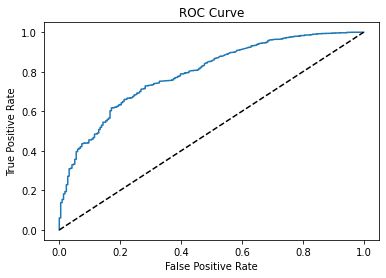

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver='liblinear')
runModel(model, x_train[predictors], x_train[target], 
         x_test[predictors], x_test[target], model_name="Logistic Regression")



Test accuracy for Decision Tree is 0.9411074612857814.
AUC for Decision Tree = 0.720


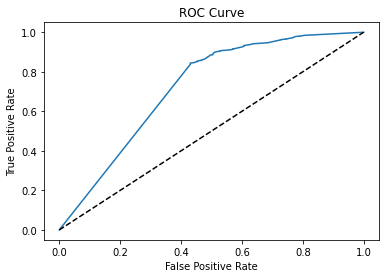

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
runModel(dt_model, x_train[predictors], x_train[target], 
         x_test[predictors], x_test[target], "Decision Tree")

Test accuracy for KNN is 0.9483810417644298.
AUC for KNN = 0.660


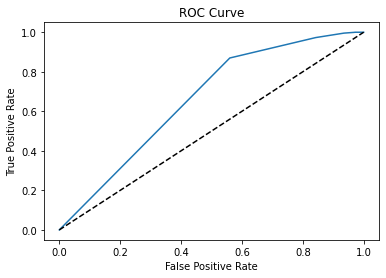

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
runModel(knn_model, x_train[predictors], x_train[target], 
         x_test[predictors], x_test[target], "KNN")